<a href="https://colab.research.google.com/github/masrik-dev/Deep-Learning-with-TensorFlow-and-Python/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Introduction to Regression with Neural Networks in TensorFlow**

 There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## **Creating data to view and fit**

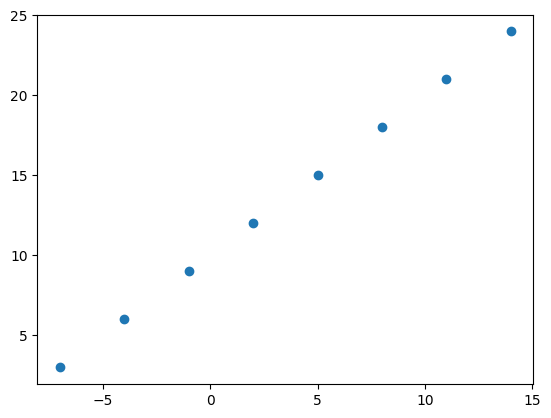

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y);

In [3]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## **Input and output shapes**

In [4]:
# Create a demo tensor for our housing prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], Y[0]

(np.float64(-7.0), np.float64(3.0))

In [6]:
X[1], Y[1]

(np.float64(-4.0), np.float64(6.0))

In [7]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0], Y[0]

(np.float64(-7.0), np.float64(3.0))

In [11]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
X.ndim, Y.ndim

(1, 1)

In [13]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

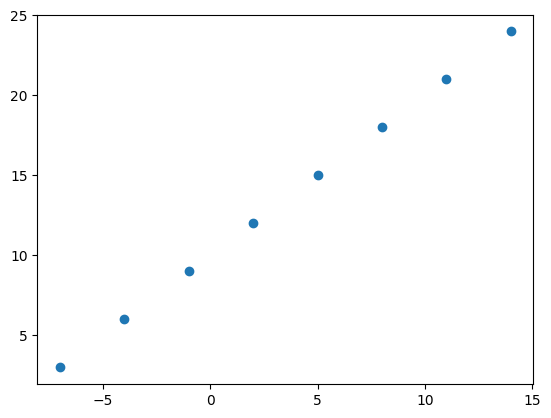

In [14]:
plt.scatter(X, Y)

## **Steps in modelling with TensorFlow**

1. **Creating a model** - define the input an doutput layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is), the optimizer (tells our model how to improve the patterns its learning), and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & Y (feqtures and labels).


In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 17.9225 - mae: 17.9225
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - loss: 17.6413 - mae: 17.6413
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 17.3600 - mae: 17.3600
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - loss: 17.0788 - mae: 17.0788
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - loss: 16.7975 - mae: 16.7975


In [16]:
# Check out X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Try and make a prediction using this model
P = model.predict(np.array([17.0])) # make input as NumPy array
T = model.predict(tf.constant([17.0])) # make input as Tensor
P, T

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


(array([[-12.249191]], dtype=float32), array([[-12.249191]], dtype=float32))

In [18]:
model.predict(tf.constant([20.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[-14.417431]], dtype=float32)

### **Improving our model**

We can improve our model, by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [19]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step - loss: 14.3569 - mae: 14.3569
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 14.2244 - mae: 14.2244
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 14.0919 - mae: 14.0919
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 13.9594 - mae: 13.9594
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 13.8269 - mae: 13.8269
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 13.6944 - mae: 13.6944
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 13.5619 - mae: 13.5619
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 13.4294 - mae: 13.4294
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 13.2969 - mae: 13.2969
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 13.1644 - mae: 13.1644
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 13.0319 - mae: 13.0319
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 12.8994 - mae: 12.8994
Epoch 13/100
1/1 ━━

In [20]:
# Remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Let's see if our model's prediction has improved
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[29.450644]], dtype=float32)

### **Let's update our model again**

In [22]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step - loss: 13.3005 - mae: 13.3005
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12.7196 - mae: 12.7196
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12.1357 - mae: 12.1357
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 11.5422 - mae: 11.5422
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.9510 - mae: 10.9510
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 10.3381 - mae: 10.3381
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 9.6987 - mae: 9.6987
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 9.0288 - mae: 9.0288
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 8.3220 - mae: 8.3220
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 7.5775 - mae: 7.5775
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 6.7807 - mae: 6.7807
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5.9260 - mae: 5.9260
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━

In [23]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
# Let's see if our model's prediction has improved
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[32.024704]], dtype=float32)

### **Let's improve our model again**

* Next, increase the number of hidden units (we already tried **tf.keras.layers.Dense(100, activation="relu")**), so we skip this part.
* Now, we will change the **activation function**

In [25]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - loss: 13.2342 - mae: 13.2342
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.6742 - mae: 12.6742
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.1114 - mae: 12.1114
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 11.5428 - mae: 11.5428
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.9655 - mae: 10.9655
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10.3764 - mae: 10.3764
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.7726 - mae: 9.7726
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 9.1510 - mae: 9.1510
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 8.5083 - mae: 8.5083
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 7.8412 - mae: 7.8412
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.2313 - mae: 7.2313
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.2095 - mae: 7.2095
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [26]:
# Let's remember our data again
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [27]:
# Let test our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[27.64626]], dtype=float32)

### **Again, Let improve our model**
* Change the optimization function from **SGD** to **Adam**

In [28]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.3590 - mae: 12.3590
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.2622 - mae: 12.2622
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 12.1652 - mae: 12.1652
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.0678 - mae: 12.0678
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 11.9702 - mae: 11.9702
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.8722 - mae: 11.8722
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 11.7740 - mae: 11.7740
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 11.6754 - mae: 11.6754
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 11.5765 - mae: 11.5765
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 11.4772 - mae: 11.4772
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 11.3776 - mae: 11.3776
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 11.2776 - mae: 11.2776
Epoch 13/100
1/1 ━━━━━━━━━━

In [29]:
# Let's remember our data again
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [30]:
# Test our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


array([[30.735758]], dtype=float32)

### **Let's improve our model again**
* Change the **learning rate = lr** of the optimization function **Adam()**

In [31]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # default lr= 0.001
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.7227 - mae: 13.7227
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 12.7715 - mae: 12.7715
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 11.8220 - mae: 11.8220
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 10.8669 - mae: 10.8669
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 9.8979 - mae: 9.8979
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 8.9062 - mae: 8.9062
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 7.8832 - mae: 7.8832
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 6.8215 - mae: 6.8215
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 6.8684 - mae: 6.8684
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 7.3081 - mae: 7.3081
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 7.8518 - mae: 7.8518
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 7.9794 - mae: 7.9794
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [32]:
# Let's remember our data again
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [33]:
# Let's test our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[28.798191]], dtype=float32)

### **Almost correct prediction but not super good**

> when it comes to evaluation... **Visualize it**

It's a good idea to visualize:
* **The Data -** what data are we working with? What does it look like?
* **The model itself -** what does our model look like?
* **The training of a model -** how does a model perform while it learns?
* **The predictions of the model -** how do the predictions of a model line up against the ground truth (the original labels)?

In [34]:
# Make a biddger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [35]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

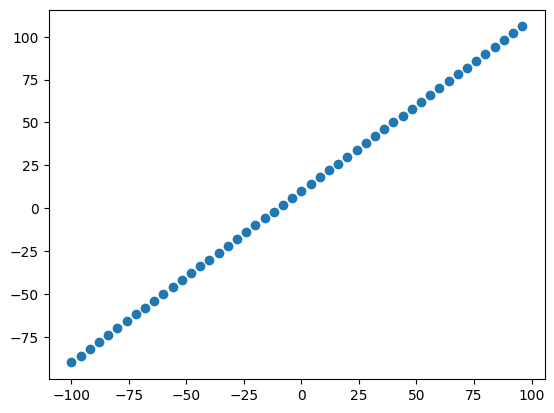

In [36]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### **The 3 sets**
* **Training set -** the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set -** the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set -** the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [37]:
# Check the length of how many samples we have
len(X)

50

In [38]:
# Split the data into train and test sets
X_train = X[0:40]   # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:]   # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### **Visualizing the data**
* **Now, we'he got our data in training and test sets. Let's visualize it again!**

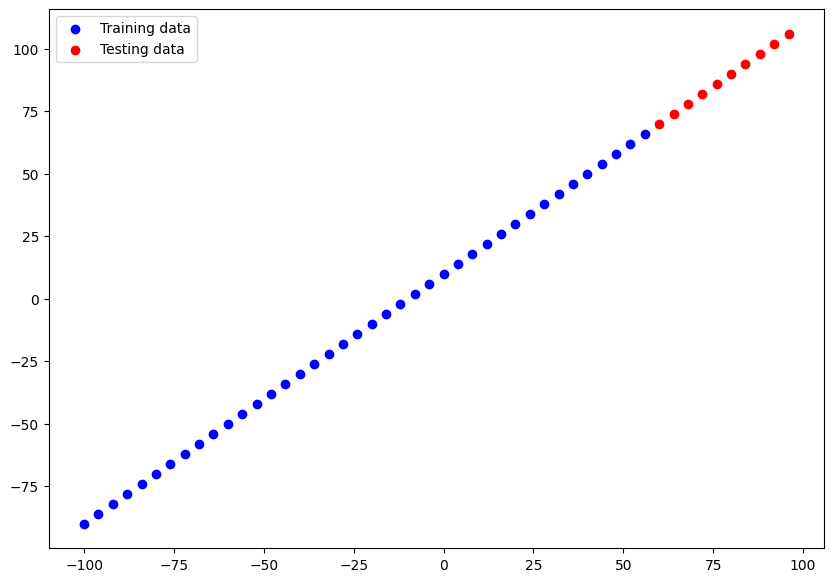

In [39]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in red
plt.scatter(X_test, y_test, c="r", label="Testing data")

# Show a legend
plt.legend();

In [40]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 108.4348 - mae: 108.4348 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 73.2665 - mae: 73.2665
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 38.2399 - mae: 38.2399
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.7025 - mae: 8.7025
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.4619 - mae: 8.4619
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.2211 - mae: 9.2211
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 8.2764 - mae: 8.2764
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.9602 - mae: 8.9602
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.9860 - mae: 7.9860
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.6464 - mae: 9.6464
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.9682 - mae: 7.9682
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.6348 - mae: 9.6348
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [41]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** - total number of parameters in the model.
* **Trainable params** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** - these parameters aren't updated during training (this is typical when we bring in already learn patterns or parameters from other models during **transfer learning**).

🎬**Resource:** For a more in-depth overview of the trainable parameters within a layer: **MIT's introduction to deep learning video** https://www.youtube.com/watch?v=alfdI7S6wCY



In [43]:
# We will change the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling "model.summary()"
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [44]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 3)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
print(X_train.ndim)

1


In [46]:
# Let's test our model
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Let's fit our model to the training data
model.fit(X_train, tf.expand_dims(y_train, axis=-1), epochs=100, verbose=1) # Reshape the dimension of y_train to match output

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 29.4301 - mae: 29.4301 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 22.1077 - mae: 22.1077 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 17.5766 - mae: 17.5766
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13.7219 - mae: 13.7219
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.1877 - mae: 10.1877
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.8279 - mae: 7.8279
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.9735 - mae: 7.9735
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.8242 - mae: 7.8242
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.8686 - mae: 7.8686
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.8825 - mae: 7.8825
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.8350 - mae: 7.8350
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.6374 - mae: 7.6374
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━

In [47]:
# Get a summary of our model
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 3)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

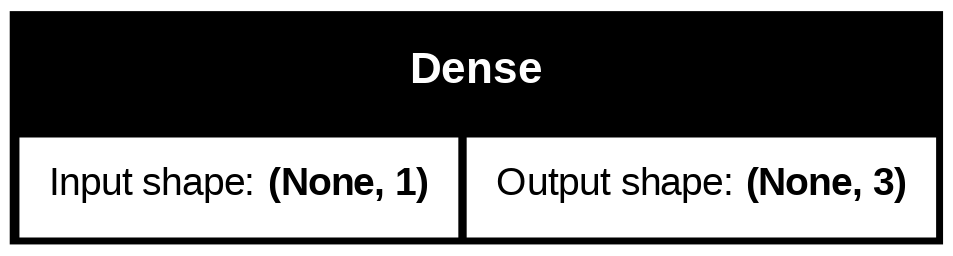

In [48]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

In [49]:
# Let's test our model
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Let's fit our model to the training data
model.fit(X_train, tf.expand_dims(y_train, axis=-1), epochs=100, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# Get a summary of our model
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 3)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12 (52.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

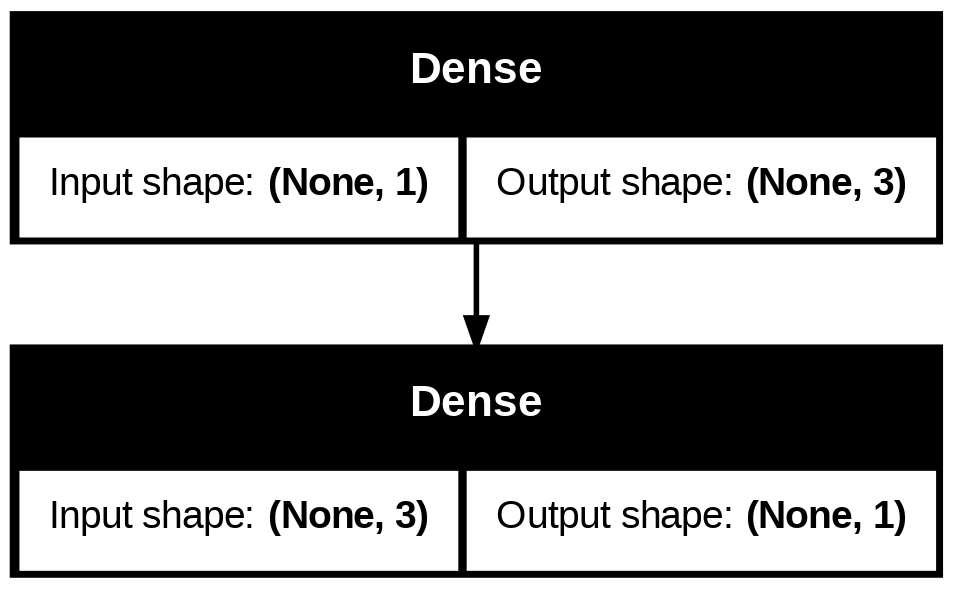

In [51]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### **Visualizing our model's prediction**

* To visualize predictions, it's a good idea to plot them against the ground truth labels.
* Often we'll see this in the form of **y_test** or **y_true** versus **y_pred** (ground truth versus our model's predictions).

In [52]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[45.714268],
       [48.62198 ],
       [51.529686],
       [54.437397],
       [57.345104],
       [60.25282 ],
       [63.160526],
       [66.06823 ],
       [68.975945],
       [71.88365 ]], dtype=float32)

In [53]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If we are going to reuse some kind of functionality in the future, it's good idea to turn it into a function.

In [54]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


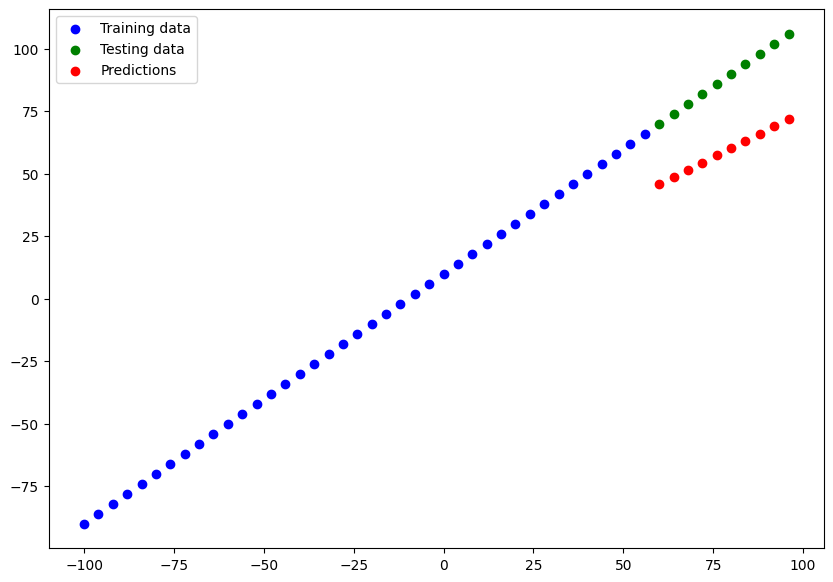

In [55]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

## **Evaluting our model's predictions with regression evaluating metrics**

**Depending on the problem we're working on, there will be different evaluation metrics to evaluate your model's performance.**

Since we're working on a regression, two of the main metrics:
* **MAE - mean absolute error, "on average, how wrong is each of the model's predictions"**
* **MSE - mean square error, "on average, how wrong is the square of each of the models predictions"**

In [56]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 29.2010 - mae: 29.2010


[29.201040267944336, 29.201040267944336]

In [57]:
# Calculate the mean absolute error
mae = tf.keras.metrics.MeanAbsoluteError()
mae.update_state(y_test, y_pred)
result = mae.result().numpy()
print(result)

29.20104


In [58]:
# Calculate the mean absolute error (in latest version this code will work)
tf.keras.metrics.mae(y_true=y_test,
                     y_pred=y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([24.285732, 25.378021, 26.470314, 27.562603, 28.654896, 29.74718 ,
       30.839474, 31.93177 , 33.024055, 34.11635 ], dtype=float32)>

**We should have one output value like previous cell.**

In [59]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[45.714268],
       [48.62198 ],
       [51.529686],
       [54.437397],
       [57.345104],
       [60.25282 ],
       [63.160526],
       [66.06823 ],
       [68.975945],
       [71.88365 ]], dtype=float32)>

In [60]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**y_pred** has extra dimention (10, 1) than **y_test** (10,)

In [61]:
# Let's bring out the extra dimension in y_pred
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([45.714268, 48.62198 , 51.529686, 54.437397, 57.345104, 60.25282 ,
       63.160526, 66.06823 , 68.975945, 71.88365 ], dtype=float32)>

In [62]:
# Calculate the mean absolute error
mae = tf.keras.metrics.mae(y_true=y_test,
                           y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=29.201040267944336>

In [63]:
# Calculate the mean square error
mse = tf.keras.metrics.mse(y_true=y_test,
                           y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=862.5437622070312>

In [64]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.metrics.mae(y_true=y_test,
                              y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.keras.metrics.mse(y_true=y_test,
                              y_pred=tf.squeeze(y_pred))


### **Running experiments to improve our model**

`Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...`

1. **Get more data-** get more examples for your model to train on (more opportunities to learn patterns or relationships or relationships between features and labels).
2. **Make our model larger (using a more complex model)-** this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer-** give your model more of a chance to find patterns in the data.


In [65]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**Let's do 3 modelling experiments:**
1. **`model_1`-** same as the original model, **1** layer, trained for **100** epochs.
2. **`model_2`- 2** layers, trained for **100** epochs.
3. **`model_3`- 2** layers, trained for **500** epochs.

### **Build `model_1`**

In [66]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 49.5919 - mae: 49.5919 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 16.6867 - mae: 16.6867
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.3414 - mae: 10.3414
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.8582 - mae: 7.8582
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.8529 - mae: 10.8529
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.6565 - mae: 7.6565
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.0274 - mae: 12.0274
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.1848 - mae: 8.1848
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.8410 - mae: 8.8410
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.7860 - mae: 7.7860
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.7603 - mae: 10.7603
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.5899 - mae: 7.5899
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


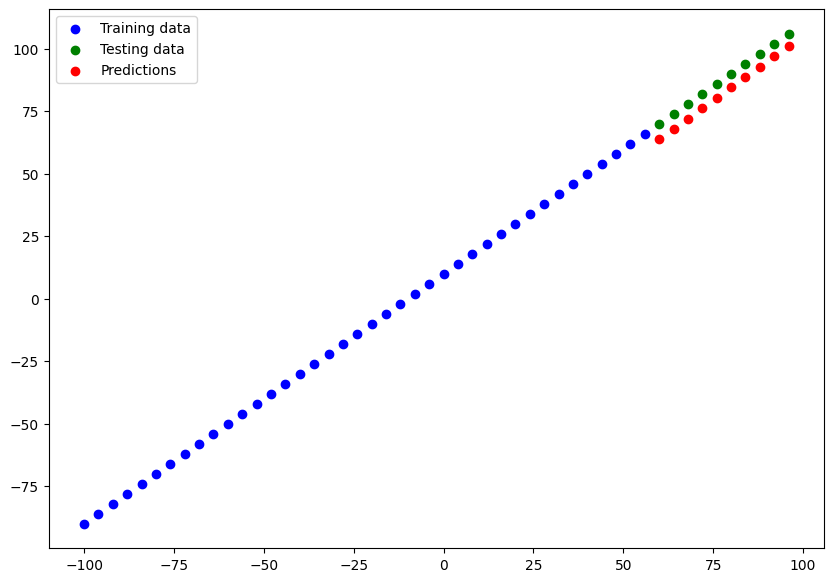

In [67]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [68]:
# Calculate model_1 evaluation matrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=5.53426456451416>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.832666397094727>)

### **Build `model_2`**
* **2** dense layers, trained for **100** epochs

In [69]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 34.4137 - mse: 1950.4019 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 25.2753 - mse: 1049.5630
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 22.2907 - mse: 729.7673
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 21.4663 - mse: 629.0307
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 22.1222 - mse: 659.9947
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 14.7362 - mse: 317.6605 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 15.4583 - mse: 334.2083
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 15.8039 - mse: 341.1195 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 11.3074 - mse: 200.5430 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 15.1352 - mse: 315.0838
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11.0453 - mse: 193.8300
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 14.8679 - mse: 304.9762
Epoch 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


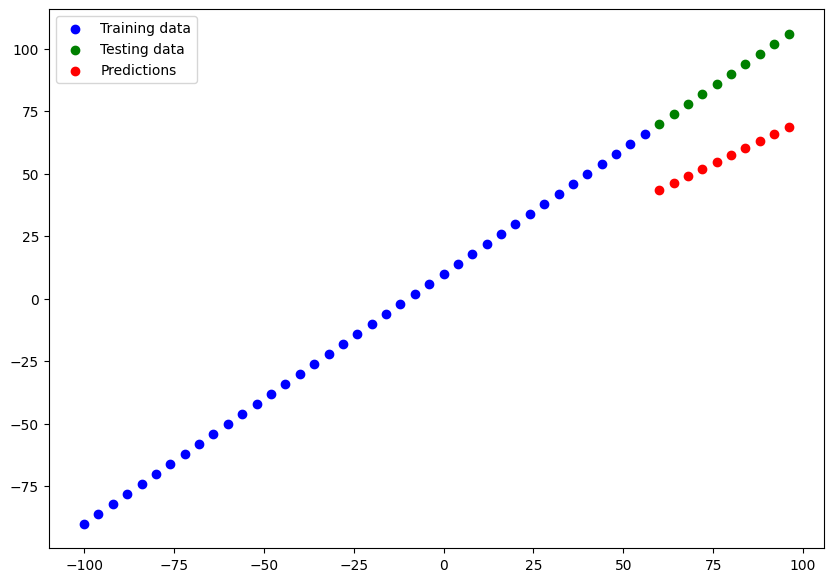

In [70]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [71]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=31.752758026123047>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1020.1220703125>)

### **Build `model-3`**
* **2** layers, trained for **500** epochs.

In [72]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 45.5472 - mae: 45.5472 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 24.7124 - mae: 24.7124
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 19.8672 - mae: 19.8672
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 17.3969 - mae: 17.3969
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 16.1832 - mae: 16.1832
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 16.3357 - mae: 16.3357
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.8536 - mae: 11.8536
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.7541 - mae: 14.7541
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 15.6432 - mae: 15.6432
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.7716 - mae: 11.7716
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14.7551 - mae: 14.7551
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.8760 - mae: 10.8760
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


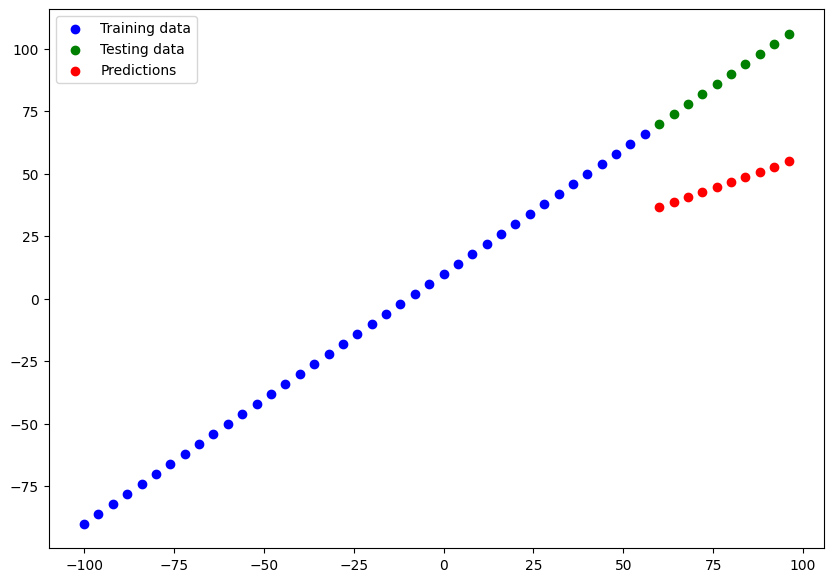

In [73]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [74]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=42.216495513916016>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1814.1181640625>)

🔑 **Note: We have to start with small experiments (small models) and make sure they work and then increase their scale when necessary.**

## **Comparing the results of mour experiments**
We've run a few experiments, let's compare the results.

In [75]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,5.534265,30.832666
1,model_2,31.752758,1020.122070
2,model_3,42.216496,1814.118164


**Looks like model_1 performed the best**

* **Note: This can change each time we run the code. During code run for the 1st time, `model_1` performed best.**

In [76]:
model_1.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

🔑 **Note: One of our main goal should be to minimize the time between our experiments. The more experiments we do, the more things we'll figure out which don't work. And in turn, we'll get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".**

## **Tracking our experiments**

One really good habit in machine learning modelling is to track the results of our experiments.

And when we'll doing so, it can be tedious if we're running lots of experiments.

Luckily, there are tools to help us!

⚒ **Resource:** As we build more models, we'll be using:
* **TensorBoard**- a component of the TensorFlow library to help track modelling experiments.
* **Weights & Biases**- a tool for tracking all of kinds of machine learning experiments (plug straight into TensorBoard)

# **Saving our models**
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:
1. **The SavedModel format**
2. **The HDF5 format**

In [77]:
# Save model using the SavedModel format
tf.saved_model.save(model_1, 'best_model_SavedModel_format')

In [78]:
# Save model using the HDF5 format
model_1.save('best_model_SavedModel_format.h5')

## Save in SavedModel format
`model.save('my_model', save_format='tf')`

## Save in HDF5 format
`model.save('my_model.h5')`

In [79]:
# Test of savedmodel
# model.save('model_1', save_format='tf')
# the line do not work
model_1.save('model_1_save_test.keras')
# Worked but don't know how to use it

In [80]:
# Test the HDF5 model
model.save('model_1_test_hdf5.h5')
# Worked but don't know how to use it

### **Test Something came to my mind**

In [81]:
tf.saved_model.save(model_1, 'test_hdf5.h5')

* Worked, but looks like the file name is **`test_hdf5.h5`**
* The process is not **HDF5** but **SavedModel**

## **Loading in a saved model**

In [82]:
# Load in the SavedModel format model
loaded_saved_model = tf.keras.layers.TFSMLayer("/content/best_model_SavedModel_format", call_endpoint='serving_default')
loaded_saved_model

<TFSMLayer name=tfsm_layer, built=True>

In [83]:
loaded_again = tf.saved_model.load("/content/best_model_SavedModel_format")
loaded_again

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7c6937021f90>

In [84]:
# loaded_again.summary()
# Can't implement the `summary()` application

### **use this bellow format**

In [85]:
# But we can apply it ("summary()") in `.h5` file.
load_model = tf.keras.models.load_model("/content/best_model_SavedModel_format.h5")
load_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [86]:
model_1.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [87]:
# Compare model_1 predictions with SavedModel format model predictions
# Use the model that can call `.summary()` ~ here the model of `.h5` file
model_1_preds = model_1.predict(X_test)
load_model_preds = load_model.predict(X_test)
model_1_preds == load_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [88]:
mae(y_true = y_test, y_pred = model_1_preds) == mae(y_true = y_test, y_pred = load_model_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [89]:
load_model == loaded_again

False

## **Download a model ( or any other file) from Google Colab**

If we want to download our files from Google Colab:
1. We can go to the "files" tab and right click on the file we're after and click "download"
2. Use code (see the cell below).
3. Save it to Google Drive by connecting  Google Drive and copying it there (see 2nd code cell below).

In [90]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_SavedModel_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [91]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp "/content/best_model_SavedModel_format.h5" "/content/drive/MyDrive/Colab_Notebooks"

In [92]:
!ls /content/drive/MyDrive/Colab_Notebooks

 00_tensorflow_fundamentals.ipynb
 01_neural_network_regression_with_tensorflow.ipynb
 best_model_SavedModel_format.h5
'Copy of 00_tensorflow_fundamentals (1).ipynb'
'Copy of 00_tensorflow_fundamentals (2).ipynb'
'Copy of 00_tensorflow_fundamentals (3).ipynb'
'Copy of 00_tensorflow_fundamentals (4).ipynb'
'Copy of 00_tensorflow_fundamentals (5).ipynb'
'Copy of 00_tensorflow_fundamentals.ipynb'
'Copy of 01_neural_network_regression_with_tensorflow (1).ipynb'
'Copy of 01_neural_network_regression_with_tensorflow (2).ipynb'
'Copy of 01_neural_network_regression_with_tensorflow (3).ipynb'
'Copy of 01_neural_network_regression_with_tensorflow (4).ipynb'
'Copy of 01_neural_network_regression_with_tensorflow (5).ipynb'
'Copy of 01_neural_network_regression_with_tensorflow (6).ipynb'
'Copy of 01_neural_network_regression_with_tensorflow (7).ipynb'
'Copy of 01_neural_network_regression_with_tensorflow (8).ipynb'
'Copy of 01_neural_network_regression_with_tensorflow.ipynb'


## **A Larger Example**

In [93]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [94]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [96]:
insurance["smoker"].dtype, insurance["age"].dtype

(dtype('O'), dtype('int64'))

In [97]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [98]:
# Create X & Y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [99]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [100]:
# View y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [101]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [102]:
model_1.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [103]:
# Build a neural network (sort of like model_1 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10190.6572 - mae: 10190.6572
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7508.8184 - mae: 7508.8184 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7831.0786 - mae: 7831.0786 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7144.5269 - mae: 7144.5269
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7640.4204 - mae: 7640.4204
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7595.8574 - mae: 7595.8574 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7533.5942 - mae: 7533.5942
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7719.8154 - mae: 7719.8154
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7375.4839 - mae: 7375.4839 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7801.5088 - mae: 7801.5088 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7403.3428 - mae: 7403.3428
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [104]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8072.5996 - mae: 8072.5996  


[8042.01513671875, 8042.01513671875]

In [105]:
y_train.median(), y_train.mean()

(9575.4421, np.float64(13346.089736364485))

**Right now it looks like our model isn't performing too well... let's try and improve it!**

**To (try) improve our model, we'll run 2 experiments:**
1. Add an extra layer with more hidden Units and use Adam()
2. Train for longer (200 epochs)

In [106]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13269.8203 - mae: 13269.8203
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13100.6162 - mae: 13100.6162
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12774.8418 - mae: 12774.8418
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12135.3271 - mae: 12135.3271
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11028.1416 - mae: 11028.1416
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9553.9004 - mae: 9553.9004
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8162.8506 - mae: 8162.8506
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7465.0264 - mae: 7465.0264
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7366.1528 - mae: 7366.1528
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7341.4653 - mae: 7341.4653
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7319.4526 - mae: 7319.4526
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [107]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4809.2529 - mae: 4809.2529  


[4676.6181640625, 4676.6181640625]

In [108]:
# Set random model
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)



Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13262.7275 - mae: 13262.7275
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13094.2939 - mae: 13094.2939
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12756.4629 - mae: 12756.4629
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12091.0391 - mae: 12091.0391
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10970.7656 - mae: 10970.7656
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9529.5967 - mae: 9529.5967
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8185.4248 - mae: 8185.4248
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7516.7256 - mae: 7516.7256
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7415.7539 - mae: 7415.7539
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7389.9375 - mae: 7389.9375
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7367.7827 - mae: 7367.7827
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [109]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3463.9878 - mae: 3463.9878  


[3398.76611328125, 3398.76611328125]

In [110]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8072.5996 - mae: 8072.5996 


[8042.01513671875, 8042.01513671875]

Text(0.5, 0, 'epochs')

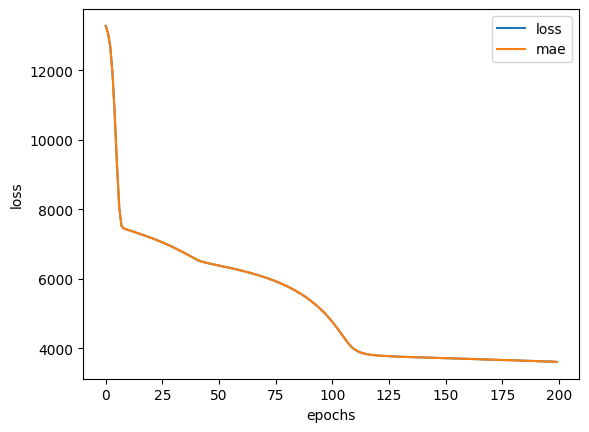

In [111]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### **Early Stopping Callback**

* Preprocessing data (normalization and standardization)
1. Turn all data into numbers (neural networks can't handle strings)
2. Make sure all of our tensors are the right shape
3. Scale features (normalize or standardize, neural networks tend to prefer normalization

In [112]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


<Axes: ylabel='Frequency'>

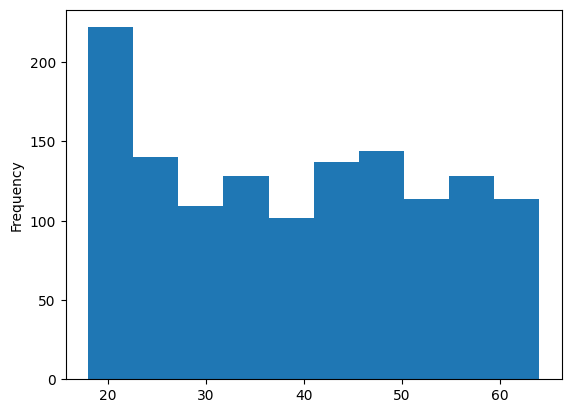

In [114]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

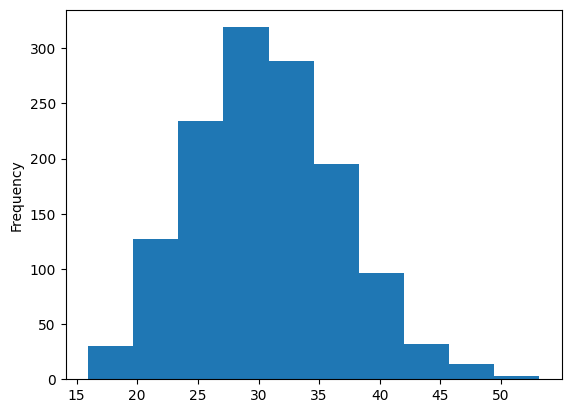

In [115]:
X["bmi"].plot(kind="hist")

In [116]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


**In terms of scaling values, neural networks tend to prefer normalization.**

**Note: If we're not sure on which to use, we could try both and see which performs better.**

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
